### 1. Pandas 

In [3]:
from pandas import Series, DataFrame

In [1]:
import numpy as np
import pandas as pd

s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'b', 'c', 'd'])
s1

a    7.3
b   -2.5
c    3.4
d    1.5
dtype: float64

In [2]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

- shape이 다르면, 공통으로 들어간 부분만 합연산이 되고 나머지는 NA로 반환

In [5]:
s1 + s2  # 겹치는 index가 없으면 데이터는 NA값으로 반환

a    5.2
b    NaN
c    7.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64

In [6]:
frame = pd.DataFrame(np.arange(12,).reshape((4,3)), columns = list('bde'), index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


- 공통으로 들어가있지 않은 부분에 대해서는 연산을 하지 못하고 NaN으로 반환

In [7]:
series = frame.loc['Utah']
series

b    0
d    1
e    2
Name: Utah, dtype: int32

In [8]:
frame - series

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Oregon,9,9,9


In [9]:
frame + series

,b,d,e
Utah,0,2,4
Ohio,3,5,7
Texas,6,8,10
Oregon,9,11,13


- apply map (개별적으로 적용)과 apply 메소드 (특정 열/행 방향으로 적용)

In [10]:
f = lambda x: x.max() - x.min()
frame.apply(f)  # default, axis = 0 행방향, 즉 각 열에 대해 적용

b    9
d    9
e    9
dtype: int64

In [11]:
frame.apply(f, axis = 1)  # 열방향, 즉 각 행에 대해

Utah      2
Ohio      2
Texas     2
Oregon    2
dtype: int64

In [12]:
# 데이터에 개별적으로 접속하고 싶을 때,
format = lambda x: '%.2f' % x

frame.applymap(format)

,b,d,e
Utah,0.00,1.00,2.00
Ohio,3.00,4.00,5.00
Texas,6.00,7.00,8.00
Oregon,9.00,10.00,11.00


- 데이터 정렬과 순위

In [13]:
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [14]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [16]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)), index = ['three', 'one'], columns = ['d', 'b', 'a', 'c'])
frame

,d,b,a,c
three,0,1,2,3
one,4,5,6,7


In [17]:
frame.sort_index()

,d,b,a,c
one,4,5,6,7
three,0,1,2,3


In [18]:
frame.sort_index(axis=1)

,a,b,c,d
three,2,1,3,0
one,6,5,7,4


In [19]:
frame.sort_index(axis=1, ascending = False)

,d,c,b,a
three,0,3,1,2
one,4,7,5,6


##### rank

In [20]:
# 순위 매기기
frame.rank()

,d,b,a,c
three,1.0,1.0,1.0,1.0
one,2.0,2.0,2.0,2.0


In [21]:
obj = pd.Series([7, -5, 7, 3, 1, 2, 0, 4])
obj

0    7
1   -5
2    7
3    3
4    1
5    2
6    0
7    4
dtype: int64

- 동일한 값에 대해 균등하게 rank를 주기 위해서 .5등으로 표시

 각 열을 기준으로 랭킹 매김

In [22]:
obj.rank()

0    7.5
1    1.0
2    7.5
3    5.0
4    3.0
5    4.0
6    2.0
7    6.0
dtype: float64

In [23]:
obj.rank(method = 'first')  # 같은 값일 때, 먼저 나온것에 대해 순위를 먼저 부여

0    7.0
1    1.0
2    8.0
3    5.0
4    3.0
5    4.0
6    2.0
7    6.0
dtype: float64

In [25]:
obj.rank(ascending = False, method = 'max')  # 공동 1등의 경우에는 둘 다 2등으로 처리함

0    2.0
1    8.0
2    2.0
3    4.0
4    6.0
5    5.0
6    7.0
7    3.0
dtype: float64

In [26]:
frame.rank(axis=1)

,d,b,a,c
three,1.0,2.0,3.0,4.0
one,1.0,2.0,3.0,4.0


In [27]:
frame.rank()

,d,b,a,c
three,1.0,1.0,1.0,1.0
one,2.0,2.0,2.0,2.0


- 중복 색인

In [28]:
obj = pd.Series(range(5), index = ['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [29]:
obj['a']

a    0
a    1
dtype: int64

In [30]:
obj['c']

4

In [31]:
df = pd.DataFrame(np.random.randn(4,3), index = ['a','a','b','b'])
df

,0,1,2
a,-1.370179,-0.821870,0.612538
a,1.332601,-0.830514,-0.839131
b,0.129993,-2.427598,1.610277
b,0.829683,0.488355,-0.699818


In [32]:
df.loc['b']

,0,1,2
b,0.129993,-2.427598,1.610277
b,0.829683,0.488355,-0.699818


- 기본 자료 특성 탐색 (자료특성 요약과 유일값, 카운트, etc)

 .describe()시 결측값은 count하지 않음

 .mean(axis = 1, skipna = False)

 수치값이 아니어도 .describe()로 각 자료에 대한 값을 출력해줌

In [33]:
obj.value_counts()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [34]:
pd.value_counts(obj.values, sort = True)  # pandas에서도 value_counts 가능

0    1
1    1
2    1
3    1
4    1
dtype: int64

 .isin(['a', 'b'])

In [ ]:
data.dropna()  # NA인 값 삭제
data.dropna(how = 'all')  # 모든 값이 NA인 row만 제외
data.dropna(how = 'any')  # 

In [ ]:
data.dropna(thresh = 2)  # 몇 개 이상의 NA값이 들어가있는지를 기준으로

In [ ]:
data.fillna(method = 'ffill')  # 이전에 사용했던 값으로 결측치 채움

In [ ]:
data.fillna(data.mean(0))  # axis = 0이라는 의미로 계산됨

In [ ]:
data.fillna(data.mean(1))  # axis = 1이라는 의미로 계산됨

#### 계층적 색인

In [61]:

data = pd.Series(np.random.randn(10),
index = [['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
[1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data


a  1   -0.674343
   2    0.603501
   3   -1.623352
b  1   -0.299083
   2    0.780293
   3    1.940038
c  1   -0.140503
   2    0.362078
d  2    0.344563
   3    1.908635
dtype: float64

In [62]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [63]:
data['b']

1   -0.299083
2    0.780293
3    1.940038
dtype: float64

In [64]:
data['b':'c']

b  1   -0.299083
   2    0.780293
   3    1.940038
c  1   -0.140503
   2    0.362078
dtype: float64

 중복된 값이 있어서 .unstack() 불가능

In [65]:
data.unstack()  # 계층 색인 풀기; wide형

,1,2,3
a,-0.674343,0.603501,-1.623352
b,-0.299083,0.780293,1.940038
c,-0.140503,0.362078,NaN
d,NaN,0.344563,1.908635


level이 고차원인 것을 먼저 처리해줌

In [66]:
data.unstack(level=0)

,a,b,c,d
1,-0.674343,-0.299083,-0.140503,NaN
2,0.603501,0.780293,0.362078,0.344563
3,-1.623352,1.940038,NaN,1.908635


In [52]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                     index = [['a', 'b', 'b', 'b'], [1, 2, 1, 2]],
                     columns = [['Ohio', 'Ohio', 'Colorado'],
                               ['Green', 'Red', 'Green']])

In [53]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
b 2     3   4        5
  1     6   7        8
  2     9  10       11

In [54]:
frame.index.names = ['key1', 'key2']
frame

Ohio     Colorado
          Green Red    Green
key1 key2                   
a    1        0   1        2
b    2        3   4        5
     1        6   7        8
     2        9  10       11

In [55]:
frame['Ohio'].loc['a']

,Green,Red
key2,,
1,0,1


In [57]:
frame.groupby(level='key2').sum()

Ohio     Colorado
     Green Red    Green
key2                   
1        6   8       10
2       12  14       16

In [68]:
frame.groupby(level=0, axis = 1).sum()

Colorado  Ohio
key1 key2                
a    1            2     1
b    2            5     7
     1            8    13
     2           11    19

In [70]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1), 'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'], 'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [71]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [72]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [73]:
df1 = DataFrame({'key' : ['b','b','a','c','a','a','b'], 'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [74]:
df2 = DataFrame({'key' : ['a','b','d'], 'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [76]:
pd.merge(df1,df2)  # 교집합

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [77]:
pd.merge(df1,df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [78]:
df3 = DataFrame({'lkey' : ['b','b','a','c','a','a','b'], 'data1': range(7)})
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [79]:
df4 = DataFrame({'rkey' : ['a','b','d'], 'data2': range(3)})
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [80]:
pd.merge(df3, df4, left_on = 'lkey', right_on = 'rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


두 자료의 색인이 겹치는 경우 조건절로 합쳐주어야 함

In [81]:
# DataFrame은 컬럼에 대해 위와 같이 동작
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan], 'b': [np.nan, 2., np.nan, 6.], 'c': range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [84]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=['f', 'e', 'd', 'c', 'b', 'a'])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [86]:
b = Series(np.arange(len(a), dtype=np.float64), index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [87]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [88]:
b[:-2].combine_first(a[2:])  # 위의 값과 동일한 값 나옴

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

pivot()

In [89]:
ldata = DataFrame({'date': np.random.rand(9),
'item':['a','a','c', 'b', 'a', 'b', 'c', 'a', 'a'],
'value': np.arange(9)})


In [90]:
ldata

,date,item,value
0,0.717415,a,0
1,0.212303,a,1
2,0.815652,c,2
3,0.971735,b,3
4,0.899626,a,4
5,0.422140,b,5
6,0.790987,c,6
7,0.613263,a,7
8,0.536750,a,8


- 중복 제거하기

In [91]:
data = DataFrame({'k1': ['one']*3 + ['two']*4,
'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [92]:
# 중복찾기
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [93]:
# 중복제거
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


- 함수 맾핑

In [98]:
data = DataFrame({'food' : ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'], 'ounces' : [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [99]:
meat_to_animal = {
'bacon' : 'pig',
'pulled pork' : 'pig',
'pastrami' : 'cow',
'corned beef' : 'cow',
'honey ham' : 'pig',
'nova lox' : 'salmon'
}

In [100]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [101]:
data['food'].map(lambda x: meat_to_animal[x.lower()])  # 함수 형태로도 변경할 수 있음

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [102]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


- 값 치환

In [103]:
data = pd.Series([1, -999, 2, -999, -1000, 3])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [104]:
data.replace(-999, np.nan)
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

- 특이값 찾아내서 치환

In [105]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [107]:
col = data[3]

In [108]:
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [109]:
data[(np.abs(data)>3).any(1)] #데이터프레임에서 각 행에 절대값이 3을 넘어가는 것 필터링됨

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [110]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.150765,1.199915
1,a,two,-0.997174,-0.451814
2,b,one,0.046486,-0.155385
3,b,two,-0.610441,-0.153514
4,a,one,-0.394982,0.011194


In [111]:
# 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하는 방법
grouped = df['data1'].groupby(df['key1'])
# grouped 변수는 Groupby 객체
grouped


In [112]:
# 평균 구하기
grouped.mean()

key1
a   -0.080463
b   -0.281977
Name: data1, dtype: float64

In [113]:
# 색인 여러개 넘기기
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.377892
      two    -0.997174
b     one     0.046486
      two    -0.610441
Name: data1, dtype: float64

- 시각화

In [114]:
import matplotlib.pyplot as plt

In [115]:
import matplotlib.pylab as plt  # pyplot + numpy 합친 모듈

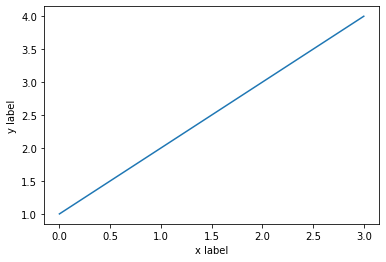

In [118]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])  # x는 0부터, y는 1부터로 해당하는 선 그려짐
plt.ylabel('y label')
plt.xlabel('x label')
plt.show()

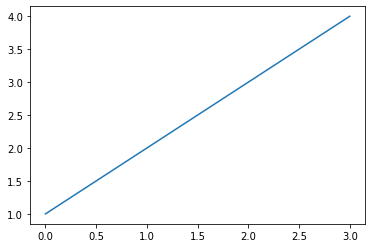

In [117]:
plt.plot([0, 1, 2, 3], [1, 2, 3, 4])

### axis의 범위를 설정할 때 왜곡돼서 보이지 않도록 주의

(0.0, 100.0, 0.0, 100.0)

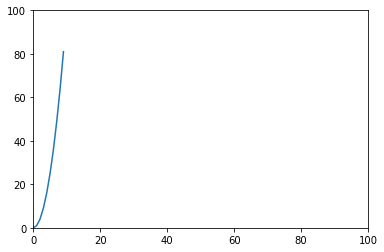

In [119]:
x = np.arange(10)
plt.plot(x**2)
plt.axis([0, 100, 0, 100])

(0.0, 10.0, 0.0, 90.0)

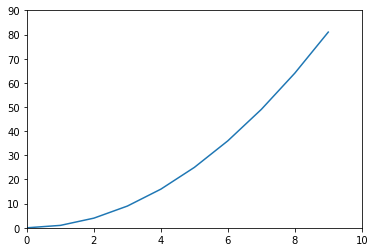

In [120]:
x = np.arange(10)
plt.plot(x**2)
plt.axis([0, 10, 0, 90])

(-30.0, 30.0, -30.0, 30.0)

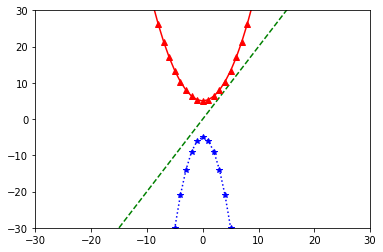

In [121]:
x = np.arange(-20, 20)
y1 = 2 * x
y2 = (1/3) * x ** 2 + 5
y3 = -x ** 2 - 5

plt.plot(x, y1, 'g--', x, y2, 'r^-', x, y3, 'b*:')
plt.axis([-30, 30, -30, 30])  # 그림을 그릴 영역 지정

- marker & symbol & description (plotting)

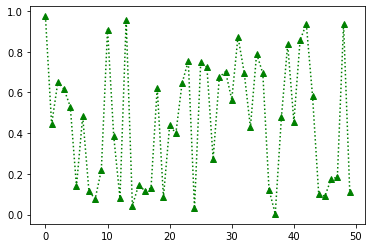

In [ ]:
N = 50
x = np.arange(N)
y = np.random.random(size=N)

plt.plot(x, y, 'g^:')  # 녹색 점선, 삼각형 모형

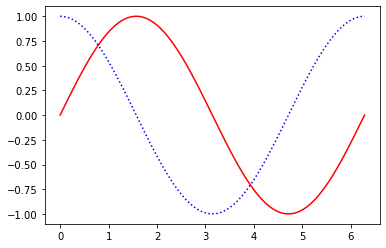

In [126]:
x = np.linspace(0, np.pi * 2, 100)  # 특정 구간에서 등구간으로 잘라냄; 2pi: 360도

fig = plt.figure()

plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'b:')

In [127]:
fig.savefig('sin_cos_fig.png')

opencv, pillow 이미지 수정 및 회전

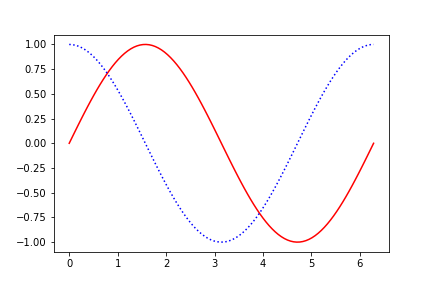

In [129]:
from IPython.display import Image  # image import해서 해당 파일을 화면에 출력

Image('sin_cos_fig.png')

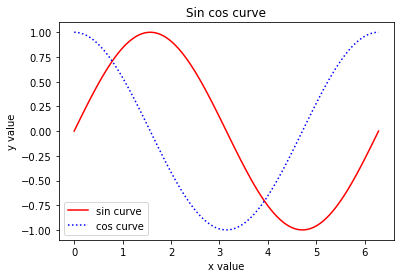

In [132]:
x = np.linspace(0, np.pi * 2, 100)

plt.title('Sin cos curve')
plt.plot(x, np.sin(x), 'r-', label = 'sin curve')  # label은 범례를 의미함
plt.plot(x, np.cos(x), 'b:', label = 'cos curve')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()  # label이 화면상에서 표현되는 위치 지정을 설정해주지 않았음

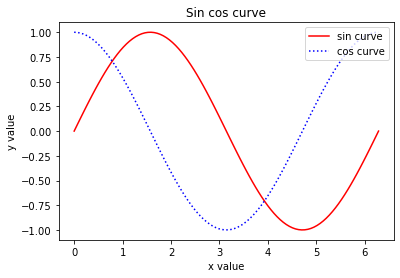

In [134]:
x = np.linspace(0, np.pi * 2, 100)

plt.title('Sin cos curve')
plt.plot(x, np.sin(x), 'r-', label = 'sin curve')  # label은 범례를 의미함
plt.plot(x, np.cos(x), 'b:', label = 'cos curve')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend(loc='upper right')  # 우측상단에 범례 위치시킴

In [135]:
plt.style.use('seaborn-whitegrid')  # 스타일시트가 격자무늬로 지정됨

In [137]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


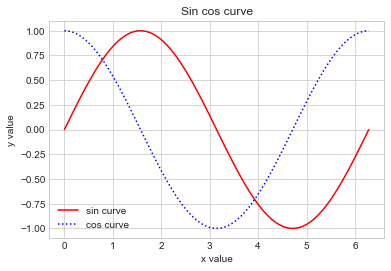

In [139]:
x = np.linspace(0, np.pi * 2, 100)

plt.title('Sin cos curve')
plt.plot(x, np.sin(x), 'r-', label='sin curve') 
plt.plot(x, np.cos(x), 'b:', label='cos curve') 
plt.xlabel('x value')
plt.ylabel('y value')
label='sin curve'
label ='cos curve'
plt.legend()

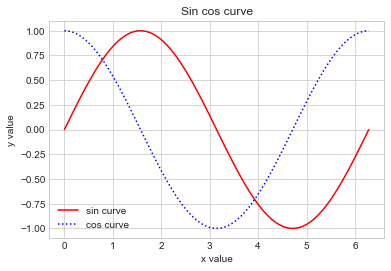

In [140]:
plt.style.use('seaborn-whitegrid')   # 스타일 적용

x = np.linspace(0, np.pi * 2, 100)

plt.title('Sin cos curve')
plt.plot(x, np.sin(x), 'r-', label='sin curve') 
plt.plot(x, np.cos(x), 'b:', label='cos curve') 
plt.xlabel('x value')
plt.ylabel('y value')
label='sin curve'
label ='cos curve'
plt.legend()

grid(), scatter()

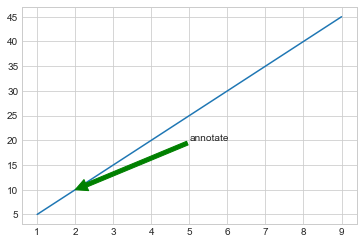

In [138]:
x = np.arange(1,10)
y = x * 5

plt.plot(x,y)
plt.annotate('annotate', xy = (2,10), xytext = (5, 20), arrowprops = {'color': 'green'})
plt.show()

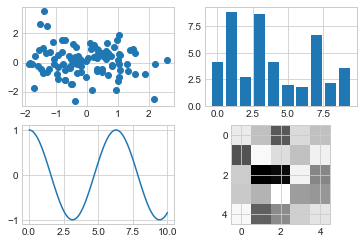

In [141]:
fig, ax = plt.subplots(2, 2) # 2행 2열의 그림을 그리는 공간을 만든다

X = np.random.randn(100)     # 정규 분포를 가지는 데이터 
Y = np.random.randn(100)     # 정규 분포를 가지는 데이터 
ax[0, 0].scatter(X, Y)       # 산점도 그림
X = np.arange(10)            # 0에서 9 사이의 연속값
Y = np.random.uniform(1, 10, 10) # 균일분포값 생성 
ax[0, 1].bar(X, Y)           # 막대 차트 그림
X = np.linspace(0, 10, 100)
Y = np.cos(X)
ax[1, 0].plot(X, Y)          # 실선으로 함수를 그림 
Z = np.random.uniform(0, 1, (5, 5))
ax[1, 1].imshow(Z)           # 분포를 2D 이미지로 그림

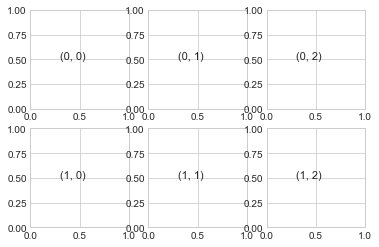

In [142]:
fig, ax = plt.subplots(2, 3)
for i in range(2):      # 2행 
    for j in range(3):  # 3열
        ax[i, j].text(0.3, 0.5, str((i,j)),fontsize = 11) # 텍스트만 표시

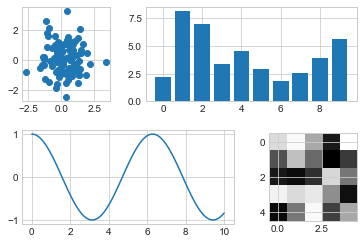

In [143]:
fig, ax = plt.subplots(2, 3)

grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
X = np.random.randn(100) # 정규 분포를 가지는 데이터
Y = np.random.randn(100) # 정규 분포를 가지는 데이터 
plt.subplot(grid[0, 0]).scatter(X, Y) # 산점도 그림

X = np.arange(10)                        # 0에서 9 사이의 연속값
Y = np.random.uniform(1, 10, 10)         # 균일분포값 생성
plt.subplot(grid[0, 1:]).bar(X, Y)       # 막대 차트 그림

X = np.linspace(0, 10, 100)
Y = np.cos(X)
plt.subplot(grid[1, :2]).plot(X, Y)      # 실선으로 함수를 그림

Z = np.random.uniform(0, 1, (5, 5))
plt.subplot(grid[1, 2]).imshow(Z)        # 분포를 2D 이미지로 그림

In [ ]:
fig, ax = matplotlib.pyplot.studio mrows = (nlrows=)

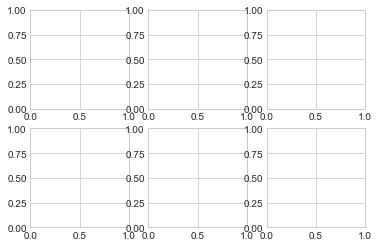

In [144]:
fig, ax = plt.subplots(2,3)

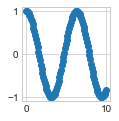

In [145]:
grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)
x = np.random.randn(100)
y = np.random.randn(100)
plt.subplot(grid[0, 0]).scatter(X, Y)

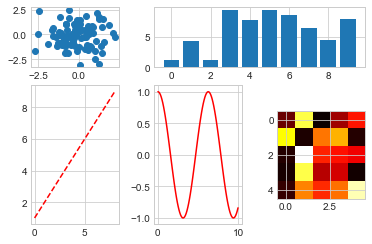

In [173]:
fig, ax = plt.subplots(3, 3)

grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)  # 그래프의 간격을 얼마나 줄 것인지 설정; wspace, hspace
X = np.random.randn(100) # 정규 분포를 가지는 데이터
Y = np.random.randn(100) # 정규 분포를 가지는 데이터 
plt.subplot(grid[0, 0]).scatter(X, Y) # 산점도 그림

X = np.arange(10)                        # 0에서 9 사이의 연속값
Y = np.random.uniform(1, 10, 10)         # 균일분포값 생성
plt.subplot(grid[0, 1:]).bar(X, Y)       # 막대 차트 그림

X = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Y = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.subplot(grid[1:, 0]).plot(X, Y, '--r')      # 실선으로 함수를 그림

X = np.linspace(0, 10, 100)
Y = np.cos(X)
plt.subplot(grid[1:, 1]).plot(X, Y, 'r')      # 실선으로 함수를 그림

Z = np.random.uniform(0, 1, (5, 5))
plt.subplot(grid[1:, 2]).imshow(Z, cmap = 'hot')        # 분포를 2D 이미지로 그림

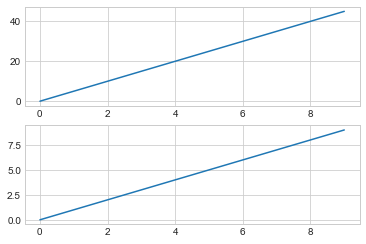

In [151]:
x = np.arange(10)
y1 = x*5
y2 = x*1
y3 = x*0.3
y4 = x*0.2

plt.subplot(2,1,1)
plt.plot(x,y1)
plt.subplot(2,1,2)
plt.plot(x,y2)
plt.show()

- 자료값의 분포를 나타내는 산점도와 막대그래프

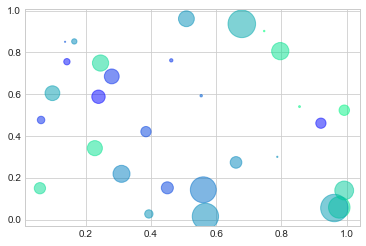

In [174]:
N = 30                     # 전체 점의 개수
x = np.random.rand(N)      # 점들의 임의의 x 좌표
y = np.random.rand(N)      # 점들의 임의의 y 좌표
colors = np.random.rand(N) # 랜덤한 색상
area = (30 * np.random.rand(N))**2 # 반지름이 0에서 15 포인트 범위

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap = 'winter')  # s는 점의 크기를 의미함, alpha는 점의 투명도 보정

([<matplotlib.axis.XTick at 0x1ca0fc814c0>,
 [Text(0, 0, '2010'), Text(1, 0, '2011'), Text(2, 0, '2012')])

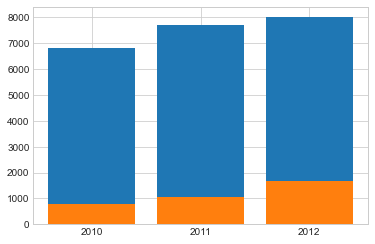

In [154]:
x = np.arange(3)
years = ['2010', '2011', '2012']
domestic = [6801, 7695, 8010]
foreign = [777, 1046, 1681]

plt.bar(x, domestic)
plt.bar(x, foreign)
plt.xticks(x, years)

([<matplotlib.axis.XTick at 0x1ca0fce4e80>,
 [Text(0, 0, '2010'), Text(1, 0, '2011'), Text(2, 0, '2012')])

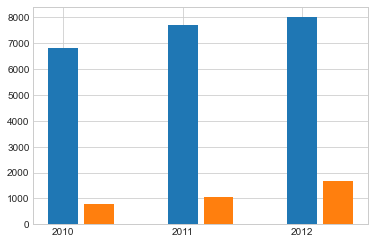

In [155]:
x = np.arange(3)
years = ['2010', '2011', '2012']
domestic = [6801, 7695, 8010]
foreign = [777, 1046, 1681]

plt.bar(x, domestic, width=0.25)
plt.bar(x + 0.3, foreign, width=0.25)
plt.xticks(x, years)

([<matplotlib.patches.Wedge at 0x1ca0fd6e4c0>,
 [Text(0.9052822457324836, 0.6248712311841147, ''),
  Text(-0.13259039153561533, 1.0919797562557798, ''),
  Text(-1.0680360152839914, 0.2632471653338249, ''),
  Text(0.26324731532894474, -1.0680359783135132, '')],
 [Text(0.4937903158540819, 0.3408388533731534, '19.23'),
  Text(-0.07232203174669927, 0.5956253215940617, '15.38'),
  Text(-0.5825650992458133, 0.14358936290935903, '23.08'),
  Text(0.14358944472487895, -0.582565079080098, '42.31')])

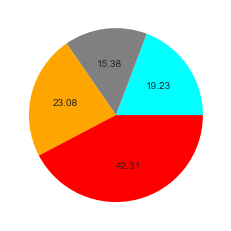

In [156]:
import matplotlib.pyplot as plt
import numpy as np

data = [5, 4, 6, 11]
clist = ['cyan', 'gray','orange', 'red']
plt.pie(data, autopct = '%.2f', colors=clist)

([<matplotlib.patches.Wedge at 0x1ca0fe10b20>,
 [Text(0.9546612773178919, 0.65895511652143, 'cyan'),
  Text(-0.1410279619060636, 1.1614693771084204, 'gray'),
  Text(-1.1457113618500998, 0.28239241372173945, 'orange'),
  Text(0.2847857320376766, -1.1554207401755279, 'red')],
 [Text(0.5431693474394901, 0.3749227387104687, '19.23%'),
  Text(-0.08075960211714751, 0.6651149424467022, '15.38%'),
  Text(-0.6602404458119218, 0.16273461129727357, '23.08%'),
  Text(0.1651278614336108, -0.6699498409421127, '42.31%')])

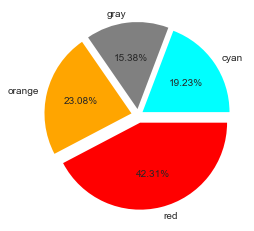

In [158]:
import matplotlib.pyplot as plt
import numpy as np

data = [5, 4, 6, 11]
clist = ['cyan', 'gray','orange', 'red']
explode = [.06, .07, .08, .09]  # parameter로 받아서 pie chart 그릴 때 간격 (공백) 보여줌
plt.pie(data, autopct = '%.2f%%', 
        colors=clist, labels=clist, explode=explode)  # labels에 명시하고 싶은 것이 있으면, 영역이 의미하는 바를 리스트 형식으로 만들어서 입력

- 한글입력 시 깨짐현상 발생

([<matplotlib.patches.Wedge at 0x1ca0f4d1280>,
 [Text(0.9546612773178919, 0.65895511652143, '싸이언'),
  Text(-0.1410279619060636, 1.1614693771084204, '그레이'),
  Text(-1.1457113618500998, 0.28239241372173945, '오렌지'),
  Text(0.2847857320376766, -1.1554207401755279, '레드')],
 [Text(0.5431693474394901, 0.3749227387104687, '19.23%'),
  Text(-0.08075960211714751, 0.6651149424467022, '15.38%'),
  Text(-0.6602404458119218, 0.16273461129727357, '23.08%'),
  Text(0.1651278614336108, -0.6699498409421127, '42.31%')])

C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Conet\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Conet\anaconda3\lib

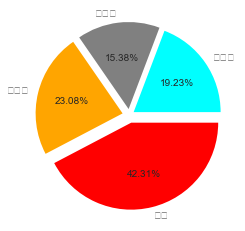

In [161]:
import matplotlib.pyplot as plt
import numpy as np

data = [5, 4, 6, 11]
clist = ['cyan', 'gray','orange', 'red']
clist1 = ['싸이언', '그레이', '오렌지', '레드']
explode = [.06, .07, .08, .09]  # parameter로 받아서 pie chart 그릴 때 간격 (공백) 보여줌
plt.pie(data, autopct = '%.2f%%', 
        colors=clist, labels=clist1, explode=explode)  # labels에 명시하고 싶은 것이 있으면, 영역이 의미하는 바를 리스트 형식으로 만들어서 입력

C:\Users\Conet\AppData\Local\Temp\ipykernel_13292\2060490627.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


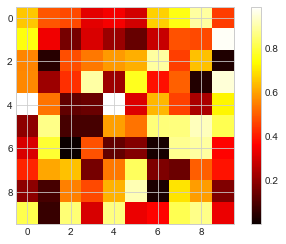

In [175]:
data = np.random.random((10, 10))  # 임의의 수를 가진 10x10 크기의 배열
plt.imshow(data, cmap = 'hot')
plt.colorbar()

로지스틱회귀분석 전 정규성 확인 필수; histogram, 확률밀도함수 그려서 확인

Text(0, 0.5, 'frequency')

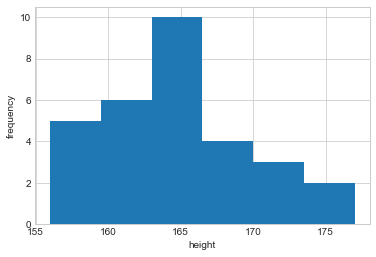

In [176]:
heights = np.array([175, 165, 164, 164, 171, 165, 160, 169, 164, 159, 163, 167, 163,172, 159, 160, 156, 162, 166, 162, 158, 167, 160, 161, 156, 172, 168, 165, 165, 177])
plt.hist(heights, bins=6)     # 히스토그램 bins는 구간의 수
plt.xlabel("height")
plt.ylabel("frequency")

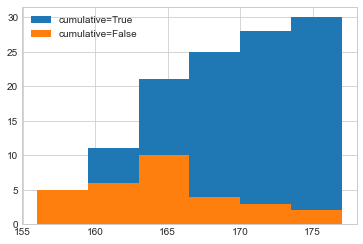

In [177]:
plt.hist(heights, bins=6, label='cumulative=True', cumulative=True)
plt.hist(heights, bins=6, label='cumulative=False', cumulative=False)
plt.legend(loc='upper left')

휴리스틱모델은 정규성 검정 필요없음

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   1.,   2.,   0.,   0.,   0.,   3.,   0.,   3.,   4.,   4.,
          2.,   3.,   1.,   3.,   1.,   4.,   2.,   3.,   6.,   3.,   6.,
          9.,   3.,   9.,   8.,  12.,  13.,  17.,  14.,  18.,  13.,  21.,
         18.,  21.,  22.,  35.,  16.,  33.,  21.,  39.,  35.,  34.,  34.,
         45.,  42.,  51.,  53.,  44.,  49.,  54.,  51.,  72.,  63.,  68.,
         58.,  65.,  72.,  73.,  90.,  89., 103.,  95., 100., 105., 119.,
        112., 132., 104., 118., 148., 109., 130.,  99., 115., 137., 116.,
        143., 121., 124., 140., 145., 144., 143., 129., 153., 156., 143.,
        133., 151., 169., 151., 137., 150., 148., 145., 140., 132., 143.,
        147., 149., 129., 106., 111., 119., 126., 105., 109.,  96., 118.,
        108.,  90., 108.,  89., 111.,  92., 100.,  99.,  80.,  87.,  72.,
         65.,  71.,  51.,  54.,  42.,  56.,  47.,  42.,  46.,  42.,  37.,
         46.,  35.,  32.,  31.,  27., 

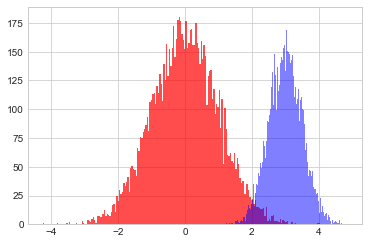

In [178]:
f1 = np.random.normal(loc=0, scale=1, size=10000)
f2 = np.random.normal(loc=3, scale=.5, size=10000)

plt.hist(f1, bins=200, color='red', alpha=.7, 
         label='loc = 0, scale = 1')
plt.hist(f2, bins=200, color='blue', alpha=.5, 
         label='loc = 3, scale = .5')

https://yoongaemii.github.io/working_posts/2020-05-15/

https://towardsdatascience.com/all-the-annoying-assumptions-31b55df246c3

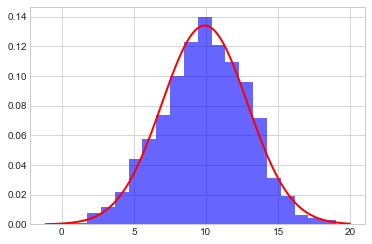

In [179]:
from scipy.stats import norm  # scipy 패키지의 stat 서브 패키지에 모듈을 사용해서 정규분포 데이터에 피팅

# 평균이 10.0이고 분산이 3인 1,000개의 데이터를 생성
data = norm.rvs(10.0, 3, size=1000)
# 히스토그램을 그림
plt.hist(data, bins=20, density=True, alpha=0.6, color='b')

# 정규 분포를 데이터에 피팅함
mu, std = norm.fit(data) 
# scipy의 pdf는 평균, 표준편차로부터 확률 밀도 함수를 생성한다
xmin, xmax = plt.xlim()  # x의 최소, 최대값을 pyplot으로 부터구함
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

- 상자수염 (boxplot) 그리기

100% 의존하면 안됨

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca164630d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca16463670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca16454e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca16463c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca16463ee0>],
 'means': []}

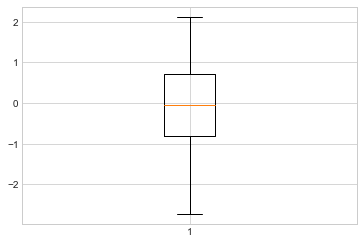

In [181]:
rand_data = np.random.randn(100)  # 넘파이의 난수 모듈에 있는 정규분포에 따르는 난수 100개 생성

plt.boxplot(rand_data)